In [96]:
import pandas as pd
import openpyxl
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

poke = pd.read_csv('Pokemon.csv')
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [73]:
poke['Power'] = poke['Total']
poke.drop(columns='Total', inplace=True)
poke.drop(['Generation'], axis=1, inplace=True)

In [74]:
poke = poke.sort_values(['Power'], ascending=False)
display(poke)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Power
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,True,780
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True,780
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,780
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,True,770
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,True,770
...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,Caterpie,Bug,NaN,45,30,35,20,20,45,False,195
288,265,Wurmple,Bug,NaN,45,45,35,20,30,20,False,195
446,401,Kricketot,Bug,NaN,37,25,41,25,41,25,False,194
322,298,Azurill,Normal,Fairy,50,20,40,20,40,20,False,190


In [75]:
poke['Power'].median() 

450.0

In [76]:
poke_strong = poke.loc[poke['Power'] > 450]
poke_common = poke.loc[poke['Power'] <= 450]

display(poke_strong)
display(poke_common)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Power
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,True,780
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True,780
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,780
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,True,770
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,True,770
...,...,...,...,...,...,...,...,...,...,...,...,...
389,356,Dusclops,Ghost,NaN,40,70,130,60,130,25,False,455
256,237,Hitmontop,Fighting,NaN,50,95,95,35,110,70,False,455
505,455,Carnivine,Grass,NaN,74,100,72,90,72,46,False,454
775,705,Sliggoo,Dragon,NaN,68,75,53,83,113,60,False,452


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Power
468,421,Cherrim,Grass,NaN,70,60,70,87,78,85,False,450
226,210,Granbull,Fairy,NaN,90,120,75,60,60,45,False,450
54,49,Venomoth,Bug,Poison,70,65,60,90,75,90,False,450
33,28,Sandslash,Ground,NaN,75,100,110,45,55,65,False,450
128,119,Seaking,Water,NaN,80,92,65,65,80,68,False,450
...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,Caterpie,Bug,NaN,45,30,35,20,20,45,False,195
288,265,Wurmple,Bug,NaN,45,45,35,20,30,20,False,195
446,401,Kricketot,Bug,NaN,37,25,41,25,41,25,False,194
322,298,Azurill,Normal,Fairy,50,20,40,20,40,20,False,190


In [77]:
poke.groupby(['Legendary']).count()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Power
Legendary,,,,,,,,,,,
False,735,735,735,374,735,735,735,735,735,735,735
True,65,65,65,40,65,65,65,65,65,65,65


In [78]:
poke['Legendary'] = poke['Legendary'].replace(True, 1)
poke['Legendary'] = poke['Legendary'].replace(False, 0)


display(poke)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Power
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,1,780
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,780
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,780
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,1,770
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,1,770
...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,Caterpie,Bug,NaN,45,30,35,20,20,45,0,195
288,265,Wurmple,Bug,NaN,45,45,35,20,30,20,0,195
446,401,Kricketot,Bug,NaN,37,25,41,25,41,25,0,194
322,298,Azurill,Normal,Fairy,50,20,40,20,40,20,0,190


In [79]:
poke_power = pd.DataFrame(poke)
poke_power.fillna('No Type 2', inplace=True)
display(poke_power)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Power
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,1,780
164,150,MewtwoMega Mewtwo Y,Psychic,No Type 2,106,150,70,194,120,140,1,780
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,780
422,382,KyogrePrimal Kyogre,Water,No Type 2,100,150,90,180,160,90,1,770
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,1,770
...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,Caterpie,Bug,No Type 2,45,30,35,20,20,45,0,195
288,265,Wurmple,Bug,No Type 2,45,45,35,20,30,20,0,195
446,401,Kricketot,Bug,No Type 2,37,25,41,25,41,25,0,194
322,298,Azurill,Normal,Fairy,50,20,40,20,40,20,0,190


In [80]:
fig1 = px.scatter(poke_power, x='Legendary', y='Power', color='Legendary' ,title='Relação Pokémon Lendário x Poder', height=500)
fig1.show()

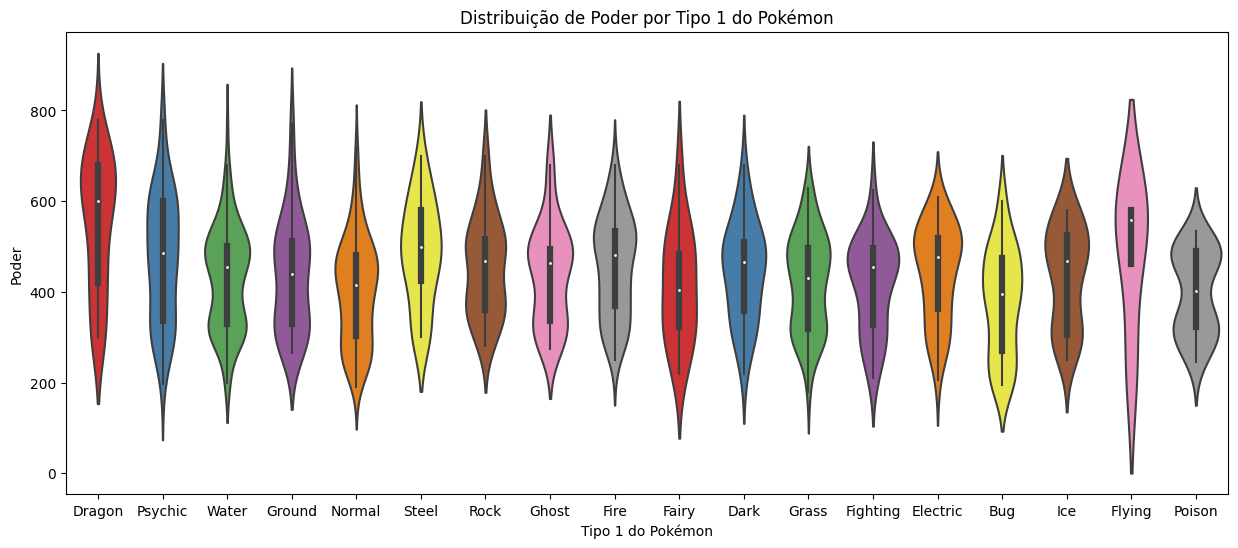

In [81]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Type 1', y='Power', data=poke_power, palette='Set1')
plt.title('Distribuição de Poder por Tipo 1 do Pokémon')
plt.xlabel('Tipo 1 do Pokémon')
plt.ylabel('Poder')
plt.show()

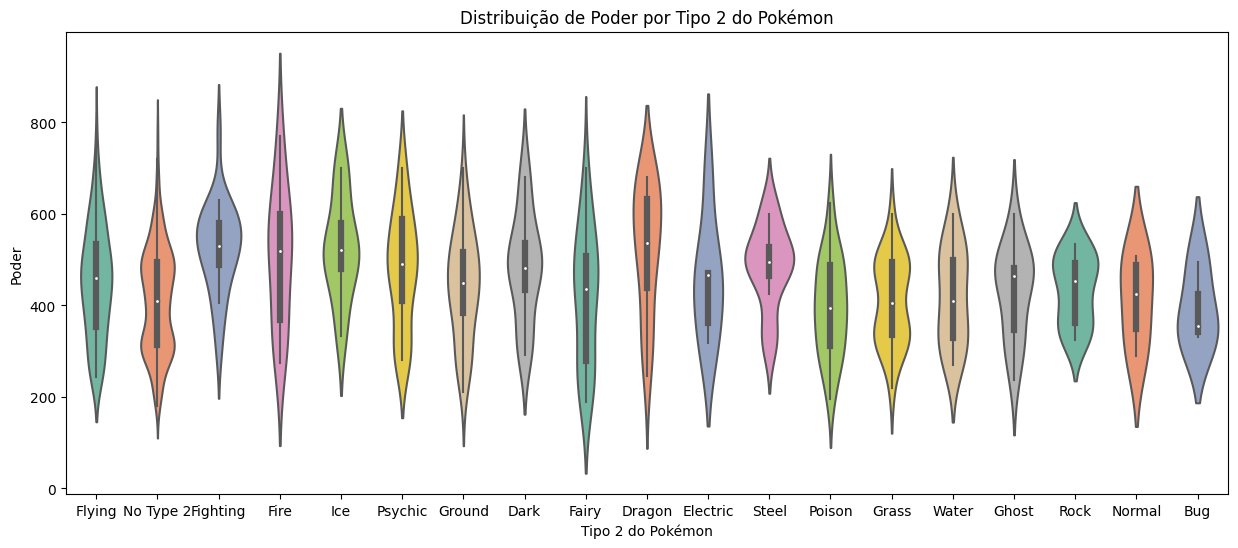

In [82]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Type 2', y='Power', data=poke_power, palette='Set2')
plt.title('Distribuição de Poder por Tipo 2 do Pokémon')
plt.xlabel('Tipo 2 do Pokémon')
plt.ylabel('Poder')
plt.show()

In [83]:
fig2 = px.line_polar(poke_power, r='Speed', theta='Type 1', line_close=True)
fig2.update_traces(fill='toself')
fig2.update_layout(
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    showlegend=True,
    title='Tipo Pokémon com maior velocidade.'
)
fig2.show()

In [84]:
fig3 = px.line_polar(poke_power, r='Defense', theta='Type 1', line_close=True)
fig3.update_traces(fill='toself')
fig3.update_layout(
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    showlegend=True,
    title='Tipo Pokémon com maior defesa.'
)
fig3.show()

In [85]:
fig4 = px.line_polar(poke_power, r='Attack', theta='Type 1', line_close=True)
fig4.update_traces(fill='toself')
fig4.update_layout(
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    showlegend=True,
    title='Tipo Pokémon com maior ataque.'
)
fig4.show()

In [86]:
fig5 = px.line_polar(poke_power, r='HP', theta='Type 1', line_close=True)
fig5.update_traces(fill='toself')
fig5.update_layout(
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    showlegend=True,
    title='Tipo Pokémon com maior HP.'
)
fig5.show()

In [97]:
top10_ranking_pokemon = poke_power.head(10)
top10_ranking_pokemon.index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
top10_ranking_pokemon.drop('#', axis=1, inplace=True)
column_order = ['Name', 'Legendary', 'Type 1', 'Type 2', 'Power', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
top10_ranking_pokemon = top10_ranking_pokemon[column_order]

display(top10_ranking_pokemon)

top10_ranking_pokemon.to_csv('top10_power_pokemon.csv')
top10_ranking_pokemon.to_excel('ranking_power_pokemon.xlsx')
top10_ranking_pokemon.to_json('top10_pokepower.json')

C:\Users\Anuar\AppData\Local\Temp\ipykernel_3516\2994728833.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Legendary,Type 1,Type 2,Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1,RayquazaMega Rayquaza,1,Dragon,Flying,780,105,180,100,180,100,115
2,MewtwoMega Mewtwo Y,1,Psychic,No Type 2,780,106,150,70,194,120,140
3,MewtwoMega Mewtwo X,1,Psychic,Fighting,780,106,190,100,154,100,130
4,KyogrePrimal Kyogre,1,Water,No Type 2,770,100,150,90,180,160,90
5,GroudonPrimal Groudon,1,Ground,Fire,770,100,180,160,150,90,90
6,Arceus,1,Normal,No Type 2,720,120,120,120,120,120,120
7,KyuremWhite Kyurem,1,Dragon,Ice,700,125,120,90,170,100,95
8,KyuremBlack Kyurem,1,Dragon,Ice,700,125,170,100,120,90,95
9,SalamenceMega Salamence,0,Dragon,Flying,700,95,145,130,120,90,120
10,MetagrossMega Metagross,0,Steel,Psychic,700,80,145,150,105,110,110
